<a href="https://colab.research.google.com/github/merdogan97/Statistics/blob/main/Statistic_Assignment_5_27_02_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [405]:
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

In [406]:
import warnings
warnings.filterwarnings('ignore')

# **Answer-1**

mean = 13.20

std = 2.5

n=40 > 30   Large Sample  => Z- Table Score

meanx= 12.20

α = 0.01


H0:    μ = 13.20, 

Ha:     μ < 13.20. 


Z = (x-µ) / (ϭ-√n) = 12.20-23.20/2.5√40= -1/0.395 = -2.53

-2.53 Z table score  p value = 0.0057

P(Z <= -2.53 | H0 True)

**H0 is rejected: there is evidence that the company is paying substandard wages.**


# **Answer-2**

In [407]:
df2 = pd.read_csv('/content/soil - Sheet1.csv')

In [408]:
df2

,Soil1,Soil2
0,1.442,1.364
1,1.943,1.878
2,1.110,1.337
3,1.912,1.828
4,1.553,1.371
5,1.641,1.428
6,1.499,1.119
7,1.347,1.373
8,1.685,1.589
9,1.578,1.714


In [409]:
df2.Soil1.dropna(axis=0, inplace=False)

0     1.442
1     1.943
2     1.110
3     1.912
4     1.553
5     1.641
6     1.499
7     1.347
8     1.685
9     1.578
10    1.866
11    1.653
12    1.665
13    1.640
14    1.976
15    1.754
16    1.589
17    1.976
18    1.863
19    1.932
20    1.570
21    1.613
22    2.054
23    1.550
24    1.714
25    1.896
26    1.737
27    1.740
28    1.708
29    1.548
Name: Soil1, dtype: float64

In [410]:
df2.Soil1.isnull().sum()

5

In [411]:
df2.describe()

,Soil1,Soil2
count,30.000000,35.000000
mean,1.691800,1.417114
std,0.206903,0.219184
min,1.110000,1.053000
25%,1.572000,1.231000
50%,1.675000,1.379000
75%,1.865250,1.559000
max,2.054000,1.878000


In [412]:
df2.Soil1.mean()

1.6918

In [413]:
df2.Soil1.std()

0.20690284243310078

In [414]:
df2.Soil1.sem()

0.03777511800418212

In [415]:
df2.Soil2.mean()

1.4171142857142855

In [416]:
df2.Soil2.std()

0.2191842860711146

In [417]:
df2.Soil2.sem()

0.03704890638852697

In [418]:
r = df2.corr()
r

,Soil1,Soil2
Soil1,1.00000,0.06493
Soil2,0.06493,1.00000


In [419]:
#Check the normality for Soil1:

stat, p = stats.shapiro(df2["Soil1"])

print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=nan, p=1.000
Sample looks Gaussian (fail to reject H0)


In [420]:
#Check the normality for Soil2:

stat, p = stats.shapiro(df2["Soil2"])

print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=0.968, p=0.401
Sample looks Gaussian (fail to reject H0)


Test the assumption of homogeneity of variance Hint: Levene’s Test

The hypotheses for Levene’s test are:

H0: "the population variances of Soil1 and Soil2 are equal"

H1: "the population variances of Soil1 and Soil2 are not equal"

In [421]:
stat, p = stats.levene(df2["Soil1"],df2["Soil2"])

print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('The population variances of Soil1 and Soil2 are equal (fail to reject H0)')
else:
	print('The population variances of Soil1 and Soil2  are not equal (reject H0)')

Statistics=nan, p=nan
The population variances of Soil1 and Soil2  are not equal (reject H0)


Conduct the significance test. Use scipy.stats.ttest_ind

H0: µ1 = µ2 ("the two population means are equal")

H1: µ1 ≠ µ2 ("the two population means are not equal")

In [422]:
stats.ttest_ind(df2["Soil1"],df2["Soil2"], equal_var = False)

Ttest_indResult(statistic=nan, pvalue=nan)

In [423]:
twosample = stats.ttest_ind(df2["Soil1"],df2["Soil2"], equal_var = False)

alpha = 0.05
p_value = twosample.pvalue

if p_value<alpha:
    print('At {} level of significance, we can reject the null hypothesis in favor of the alternative hypothesis.'.format(alpha))
else:
    print('At {} level of significance, we fail to reject the null hypothesis.'.format(alpha))

At 0.05 level of significance, we fail to reject the null hypothesis.


# **Answer-3**

In [424]:
df = pd.read_csv('/content/2015 PISA Test - Sheet1.csv', sep=",")

In [425]:
df

,Country Code,Continent_Code,internet_users_per_100,Math,Reading,Science
0,ALB,EU,63.252933,413.1570,405.2588,427.2250
1,ARE,AS,90.500000,427.4827,433.5423,436.7311
2,ARG,SA,68.043064,409.0333,425.3031,432.2262
3,AUS,OC,84.560519,493.8962,502.9006,509.9939
4,AUT,EU,83.940142,496.7423,484.8656,495.0375
...,...,...,...,...,...,...
65,TUN,AF,48.519836,366.8180,361.0555,386.4034
66,TUR,EU,53.744979,420.4540,428.3351,425.4895
67,URY,SA,64.600000,417.9919,436.5721,435.3630
68,USA,NaN,74.554202,469.6285,496.9351,496.2424


In [426]:
df.describe()

,internet_users_per_100,Math,Reading,Science
count,70.000000,70.000000,70.000000,70.000000
mean,71.973099,460.971557,460.997291,465.439093
std,16.390632,53.327205,49.502679,48.397254
min,21.976068,327.702000,346.549000,331.638800
25%,60.899020,417.416075,426.948625,425.923375
50%,72.999350,477.607150,480.199850,475.400050
75%,85.026763,500.482925,499.687475,502.431250
max,98.200000,564.189700,535.100200,555.574700


In [427]:
df["Math"].mean()

460.971557142857

In [428]:
df["internet_users_per_100"].mean()

71.97309941600001

In [429]:
df["internet_users_per_100"].std()

16.390632383534143

In [430]:
df["Reading"].mean()

460.99729142857126

In [431]:
df["Reading"].std()

49.50267853089627

In [432]:
df["Science"].mean()

465.4390928571429

In [433]:
df["Science"].std()

48.397254494364304

In [434]:
group= df.groupby("Continent_Code").mean()
group

,internet_users_per_100,Math,Reading,Science
Continent_Code,,,,
AF,43.359918,363.212100,355.457400,381.074250
AS,68.455613,466.216647,454.059682,467.945847
EU,77.274888,477.981449,476.164608,478.299381
OC,86.391704,494.559750,506.085650,511.648700
SA,60.180494,402.887700,425.359229,421.747186


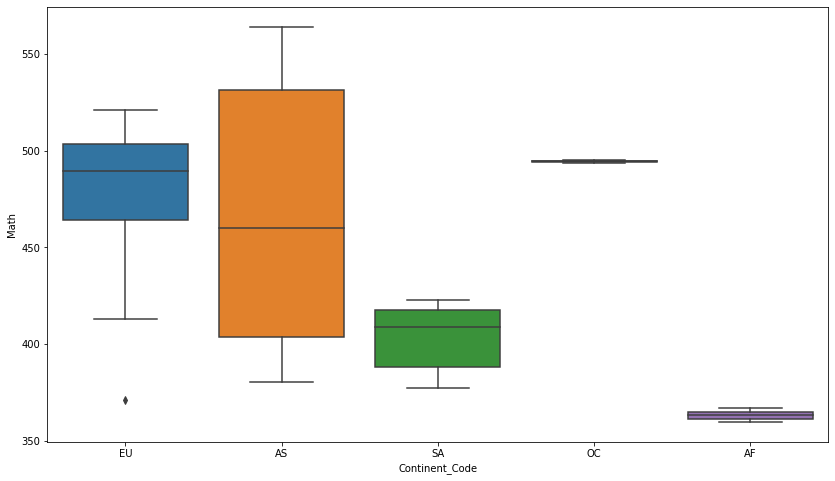

In [435]:
plt.figure(figsize=(14,8))
sns.boxplot(x=df["Continent_Code"], y="Math", data=df)
plt.show()

# **Answer-4**

In [436]:
df4 = pd.read_csv('/content/students_2014 - students_2014.csv')

In [437]:
df4

,ids,bday,enrolldate,expgradate,Rank,Major,Gender,Athlete,Height,Weight,Smoking,Sprint,MileMinDur,English,Reading,Math,Writing,State,LiveOnCampus,HowCommute,CommuteTime,SleepTime,StudyTime
0,43783,3/22/1995,NaN,NaN,NaN,NaN,0.0,0,72.35,NaN,0.0,7.978,NaN,88.24,81.50,60.02,81.44,In state,1.0,NaN,NaN,7.0,1.0
1,20278,1/1/1995,NaN,NaN,NaN,Philosophy,0.0,0,70.66,179.20,0.0,8.004,0:06:21,89.45,85.25,70.19,73.27,NaN,1.0,NaN,NaN,5.0,2.0
2,20389,12/31/1994,NaN,NaN,NaN,NaN,0.0,0,70.68,198.52,0.0,NaN,0:07:00,96.73,86.88,71.20,84.24,In state,NaN,NaN,NaN,8.0,7.0
3,22820,12/1/1994,NaN,NaN,NaN,business administration,1.0,0,NaN,198.34,NaN,8.473,0:12:44,74.06,88.68,55.89,73.16,In state,1.0,NaN,NaN,2.0,6.0
4,24559,11/10/1994,NaN,NaN,NaN,NaN,1.0,1,67.43,128.17,2.0,NaN,0:06:25,82.61,77.30,65.52,80.45,Out of state,1.0,NaN,NaN,7.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430,34021,7/18/1987,1-Aug-2011,08-May-2017,4.0,accounting,1.0,0,NaN,NaN,0.0,NaN,0:12:55,87.72,84.99,65.31,NaN,In state,0.0,1.0,18.0,1.0,10.0
431,40697,4/29/1987,1-Aug-2011,09-May-2016,4.0,NaN,0.0,0,68.50,131.92,0.0,9.125,0:08:33,91.01,86.87,70.25,82.67,In state,0.0,3.0,26.0,6.0,15.0
432,34272,NaN,1-Aug-2011,09-May-2016,4.0,nursing,0.0,1,68.10,130.07,0.0,NaN,NaN,81.05,85.76,58.16,81.87,NaN,0.0,3.0,29.0,6.0,10.0
433,33628,NaN,1-Aug-2011,08-May-2017,4.0,Nursing,1.0,1,69.27,157.26,2.0,6.905,0:08:26,75.59,85.97,66.84,79.35,In state,0.0,1.0,14.0,4.0,10.0


In [438]:
df4.describe()

,ids,Rank,Gender,Athlete,Height,Weight,Smoking,Sprint,English,Reading,Math,Writing,LiveOnCampus,HowCommute,CommuteTime,SleepTime,StudyTime
count,435.000000,406.000000,426.000000,435.000000,408.000000,376.000000,411.000000,374.000000,409.000000,425.000000,422.000000,404.000000,414.000000,247.000000,247.000000,403.000000,393.000000
mean,35279.022989,2.199507,0.521127,0.422989,68.031765,181.031569,0.430657,6.581933,82.787555,82.070800,65.468009,79.521683,0.410628,2.781377,27.000000,5.461538,7.208651
std,8637.733605,1.098641,0.500141,0.494602,5.325655,42.749680,0.766324,1.227069,6.839803,7.661778,8.375930,5.511410,0.492543,0.698996,10.072905,2.421994,4.356233
min,20183.000000,1.000000,0.000000,0.000000,55.000000,101.710000,0.000000,4.503000,59.830000,55.110000,35.320000,64.060000,0.000000,1.000000,4.000000,0.000000,0.000000
25%,28001.000000,1.000000,0.000000,0.000000,64.827500,153.860000,0.000000,5.587500,78.330000,77.190000,60.202500,75.750000,0.000000,3.000000,21.000000,4.000000,4.000000
50%,35350.000000,2.000000,1.000000,0.000000,67.570000,172.960000,0.000000,6.569000,83.150000,81.940000,65.445000,79.035000,0.000000,3.000000,27.000000,5.000000,6.000000
75%,42655.500000,3.000000,1.000000,1.000000,71.575000,204.307500,1.000000,7.458000,87.170000,87.080000,70.567500,83.687500,1.000000,3.000000,32.000000,7.000000,10.000000
max,49947.000000,4.000000,1.000000,1.000000,84.410000,350.070000,2.000000,9.597000,101.950000,103.620000,93.780000,93.010000,1.000000,4.000000,64.000000,13.000000,23.000000


In [439]:
df4new = df4.drop(["Rank","Athlete","Height","Weight","Smoking","Sprint","LiveOnCampus","bday", "HowCommute","State","CommuteTime","SleepTime","StudyTime","enrolldate","expgradate","Major","Gender","MileMinDur"], axis=1)

In [440]:
df4new

,ids,English,Reading,Math,Writing
0,43783,88.24,81.50,60.02,81.44
1,20278,89.45,85.25,70.19,73.27
2,20389,96.73,86.88,71.20,84.24
3,22820,74.06,88.68,55.89,73.16
4,24559,82.61,77.30,65.52,80.45
...,...,...,...,...,...
430,34021,87.72,84.99,65.31,NaN
431,40697,91.01,86.87,70.25,82.67
432,34272,81.05,85.76,58.16,81.87
433,33628,75.59,85.97,66.84,79.35


In [441]:
df4new.describe()

,ids,English,Reading,Math,Writing
count,435.000000,409.000000,425.000000,422.000000,404.000000
mean,35279.022989,82.787555,82.070800,65.468009,79.521683
std,8637.733605,6.839803,7.661778,8.375930,5.511410
min,20183.000000,59.830000,55.110000,35.320000,64.060000
25%,28001.000000,78.330000,77.190000,60.202500,75.750000
50%,35350.000000,83.150000,81.940000,65.445000,79.035000
75%,42655.500000,87.170000,87.080000,70.567500,83.687500
max,49947.000000,101.950000,103.620000,93.780000,93.010000


In [442]:
df4new.corr()

,ids,English,Reading,Math,Writing
ids,1.000000,0.015218,-0.091836,-0.040006,0.062961
English,0.015218,1.000000,0.333183,0.243014,0.366806
Reading,-0.091836,0.333183,1.000000,0.519849,0.105491
Math,-0.040006,0.243014,0.519849,1.000000,0.118626
Writing,0.062961,0.366806,0.105491,0.118626,1.000000


In [447]:
#Check the normality for Math:

stat, p = stats.shapiro(df4new["Math"])

print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=nan, p=1.000
Sample looks Gaussian (fail to reject H0)


In [448]:
#Check the normality for English:
stat, p = stats.shapiro(df4new["English"])

print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')


Statistics=nan, p=1.000
Sample looks Gaussian (fail to reject H0)


Test the assumption of homogeneity of variance Hint: Levene’s Test

The hypotheses for Levene’s test are:

H0: "the population variances of Math and English are equal"

H1: "the population variances of Math and English are not equal"

In [449]:
stat, p = stats.levene(df4new["Math"],df4new["English"])

print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('The population variances of group 1 and 2 are equal (fail to reject H0)')
else:
	print('The population variances of group 1 and 2 are not equal (reject H0)')

Statistics=nan, p=nan
The population variances of group 1 and 2 are not equal (reject H0)


Conduct the significance test. Use scipy.stats.ttest_ind

H0: µ1 = µ2 ("the two population means are equal")

H1: µ1 ≠ µ2 ("the two population means are not equal")

In [450]:
stats.ttest_ind(df4new["Math"],df4new["English"], equal_var = False)

Ttest_indResult(statistic=nan, pvalue=nan)

In [451]:
twosample = stats.ttest_ind(df4new["Math"],df4new["English"], equal_var = False)

alpha = 0.05
p_value = twosample.pvalue

if p_value<alpha:
    print('At {} level of significance, we can reject the null hypothesis in favor of the alternative hypothesis.'.format(alpha))
else:
    print('At {} level of significance, we fail to reject the null hypothesis.'.format(alpha))

At 0.05 level of significance, we fail to reject the null hypothesis.
